In [1]:
import scipy.io as sp
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
data = sp.loadmat('S1.mat')
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'sub', 'Fs', 'N', 'T', 'exemplarLabels', 'categoryLabels', 'X_2D', 'X_3D'])


In [21]:
print(data['exemplarLabels'].shape)

(1, 5188)


In [4]:
matrix = data['X_3D'].transpose(2,0,1)

In [5]:
matrix = np.reshape(matrix,(matrix.shape[0], matrix.shape[1]*matrix.shape[2]))
matrix = preprocessing.scale(matrix)

In [6]:
matrix.shape

(5188, 3968)

In [8]:
cat_labels = data['categoryLabels'].transpose()
cat_labels = np.reshape(cat_labels, (cat_labels.shape[0]*cat_labels.shape[1]))

In [9]:
print(cat_labels.shape)

(5188,)


In [10]:
k = 0.8
n = matrix.shape[0]
x_train = matrix[:int(k*n)]
x_test = matrix[int(k*n)+1:]
y_train = cat_labels[:int(k*n)]
y_test = cat_labels[int(k*n)+1:]
#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
#x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]*x_test.shape[2]))

In [91]:
acc = cross_validation(matrix, cat_labels)
print(acc)

0.3263969171483623


In [94]:
def split_sampling(matrix, cat_labels, k = 0.8):
    n = matrix.shape[0]
    indices = np.random.permutation(n)
    training_idx, test_idx = indices[:int(k*n)], indices[int(k*n):]
    #print(int(k*n))
    x_train, x_test = matrix[training_idx], matrix[test_idx]
    y_train, y_test = cat_labels[training_idx], cat_labels[test_idx]
    #print(indices)
    x_train = np.reshape(x_train, newshape = (x_train.shape[0],1))
    x_test = np.reshape(x_test, newshape = (x_test.shape[0],1))
    return x_train, y_train, x_test, y_test

In [74]:
def split_sampling2D(matrix, cat_labels, k = 0.8):
    n = matrix.shape[0]
    indices = np.random.permutation(n)
    training_idx, test_idx = indices[:int(k*n)], indices[int(k*n):]
    #print(int(k*n))
    x_train, x_test = matrix[training_idx,:], matrix[test_idx,:]
    y_train, y_test = cat_labels[training_idx], cat_labels[test_idx]
    #print(indices)
    return x_train, y_train, x_test, y_test

In [25]:
print(str(x_train.shape)+" "+str(x_test.shape)+" "+str(y_train.shape)+" "+str(y_test.shape))

(4150, 3968) (1038, 3968) (4150,) (1038,)


In [43]:
def lda_with_shrinkage(x_train, y_train, x_test, y_test):
    clf = LDA(solver = 'eigen',shrinkage = True)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    return accuracy_score(pred,y_test)

In [100]:
def cross_validation(matrix, cat_labels, k = 0.8, iterations = 10):
    accuracy = []
    for i in range(iterations):
        if(len(matrix.shape)>1):
            x_train, y_train, x_test, y_test = split_sampling2D(matrix, cat_labels)
        else:
            x_train, y_train, x_test, y_test = split_sampling(matrix, cat_labels)
        acc = lda_with_shrinkage(x_train, y_train,x_test, y_test)
        accuracy.append(acc)
    return np.mean(accuracy)

In [31]:
linear_clf = svm.SVC(kernel = 'linear',verbose = True)
linear_clf.fit(x_train, y_train)
linear_svm_pred = linear_clf.predict(x_test)
accuracy_score(linear_svm_pred,y_test)

[LibSVM]

0.4113680154142582

In [101]:
electrode = data['X_3D']
sh0 = electrode.shape[0];
sh1 = electrode.shape[1];
sh2 = electrode.shape[2];
acc = [];
for l in range(sh0):
    temp = []
    for k in range(sh1):
        x_tr = []; y_tr = [];
        for i in range(sh2):
            x_tr.append(electrode[l][k][i]);
            y_tr.append(cat_labels[i]);
        x_tr = np.array(x_tr)
        y_tr = np.array(y_tr)
        # use x_tr & y_tr to get accuracy and store it in acc_score
        #x_train, y_train, x_test, y_test = split_sampling(x_tr, y_tr)
        
        #print(str(x_train.shape)+" "+str(y_train.shape) )
        #print(str(x_tr.shape)+" " +str(l)+ " " + str(k))
        #temp.append(lda_with_shrinkage(x_train, y_train,x_test, y_test));
        temp.append(cross_validation(x_tr,y_tr))
    acc.append(temp);
# you have acc as 2D matrix (of size 124*32) with every value denoting accuracy accordingly.
# Plot graph of accuracy.

c:\users\naitik dodia\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


In [102]:
print(acc)

[[0.15327552986512524, 0.15183044315992295, 0.15423892100192677, 0.15616570327552987, 0.1578998073217726, 0.1539499036608863, 0.15394990366088632, 0.1531791907514451, 0.15183044315992292, 0.15394990366088632, 0.15761078998073216, 0.15741811175337186, 0.15684007707129094, 0.15558766859344894, 0.15183044315992295, 0.14845857418111752, 0.15645472061657034, 0.1558766859344894, 0.15394990366088632, 0.153757225433526, 0.14710982658959537, 0.15606936416184974, 0.1508670520231214, 0.15520231213872832, 0.1544315992292871, 0.15077071290944125, 0.15375722543352605, 0.15520231213872832, 0.15337186897880542, 0.1504816955684008, 0.15346820809248557, 0.15366088631984584], [0.15260115606936417, 0.1527938342967245, 0.15289017341040462, 0.1508670520231214, 0.14855491329479767, 0.1533718689788054, 0.15539499036608864, 0.1531791907514451, 0.15491329479768787, 0.15626204238921002, 0.1628131021194605, 0.15616570327552987, 0.15616570327552987, 0.15953757225433526, 0.1579961464354528, 0.14884393063583817, 0.1

In [71]:
import matplotlib.pyplot as plt

([array([ 4., 23.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 5., 24.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 7., 20.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 4., 22.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 7., 18.,  5.,  2.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 5., 24.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 8., 20.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 6., 21.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 4., 24.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1., 25.,  4.,  2.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 4., 20.,  6.,  1.,  1.,  0.,  0.,  0.,  0.,  0.]),
  array([ 5., 21.,  5.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 3., 25.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 5., 26.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 5., 24.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 4., 25.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 5., 23.,  4., 

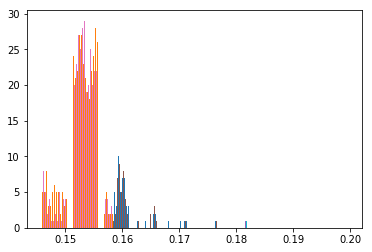

In [103]:
plt.hist(acc)

In [106]:
sh0 = electrode.shape[0];
sh1 = electrode.shape[1];
sh2 = electrode.shape[2];
acc = [];
for l in range(sh0):
    x_tr = []; y_tr = [];
    for i in range(sh2):
        temp = [];
        for k in range(sh1):
            temp.append(electrode[l][k][i]);
        x_tr.append(temp);
        y_tr.append(cat_labels[i])
    x_tr = np.array(x_tr)
    y_tr = np.array(y_tr)
    # use x_tr & y_tr to get accuracy and store it in acc_score
    #x_train, y_train, x_test, y_test = split_sampling2D(x_tr, y_tr)
    acc_score = cross_validation(x_tr, y_tr)#lda_with_shrinkage(x_train, y_train, x_test, y_test)
    acc.append(acc_score);
# you have acc as 2D matrix (of size 124) with every value denoting accuracy accordingly.
# Plot graph of accuracy.

c:\users\naitik dodia\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


(array([2., 0., 0., 0., 0., 2., 2., 0., 2., 2., 1., 1., 3., 2., 0., 1., 4.,
        2., 1., 1., 3., 3., 2., 3., 3., 3., 4., 6., 2., 5., 2., 2., 2., 0.,
        1., 1., 3., 3., 3., 2., 2., 3., 2., 2., 3., 0., 2., 1., 1., 1., 1.,
        0., 0., 1., 2., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 1., 0., 2., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 1.]),
 array([0.15423892, 0.15516813, 0.15609733, 0.15702654, 0.15795575,
        0.15888495, 0.15981416, 0.16074337, 0.16167257, 0.16260178,
        0.16353098, 0.16446019, 0.1653894 , 0.1663186 , 0.16724781,
        0.16817702, 0.16910622, 0.17003543, 0.17096463, 0.17189384,
        0.17282305, 0.17375225, 0.17468146, 0.17561067, 0.17653987,
        0.17746908, 0.17839828, 0.17932749, 0.1802567 , 0.1811859 ,
        0.18211511, 0.18304432

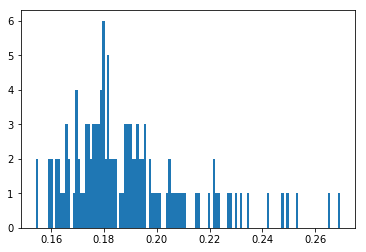

In [107]:
plt.hist(acc, bins = 124)

In [80]:
print(acc)

[0.18786127167630057, 0.17148362235067438, 0.19171483622350674, 0.16473988439306358, 0.17822736030828518, 0.19653179190751446, 0.1859344894026975, 0.18304431599229287, 0.18786127167630057, 0.16377649325626203, 0.14354527938342967, 0.18689788053949905, 0.1955684007707129, 0.1531791907514451, 0.1955684007707129, 0.16570327552986513, 0.17630057803468208, 0.174373795761079, 0.18689788053949905, 0.18882466281310212, 0.18400770712909442, 0.18882466281310212, 0.18689788053949905, 0.2023121387283237, 0.17533718689788053, 0.19171483622350674, 0.1955684007707129, 0.16666666666666666, 0.22736030828516376, 0.20809248554913296, 0.17822736030828518, 0.17341040462427745, 0.18400770712909442, 0.14450867052023122, 0.1416184971098266, 0.19845857418111754, 0.1628131021194605, 0.17052023121387283, 0.1579961464354528, 0.14836223506743737, 0.18978805394990367, 0.1464354527938343, 0.18208092485549132, 0.18882466281310212, 0.15221579961464354, 0.17148362235067438, 0.17052023121387283, 0.15221579961464354, 0.1

In [104]:
sh0 = electrode.shape[0];
sh1 = electrode.shape[1];
sh2 = electrode.shape[2];
acc = [];
for k in range(sh1):
    x_tr = []; y_tr = [];
    for i in range(sh2):
        temp = [];
        for l in range(sh0):
            temp.append(electrode[l][k][i]);
        x_tr.append(temp);
        y_tr.append(cat_labels[i]);
    x_tr = np.array(x_tr)
    y_tr = np.array(y_tr)
    # use x_tr & y_tr to get accuracy and store it in acc_score
    #x_train, y_train, x_test, y_test = split_sampling2D(x_tr, y_tr)
    acc_score = cross_validation(matrix = x_tr, cat_labels = y_tr) #lda_with_shrinkage(x_train, y_train, x_test, y_test)
    # use x_tr & y_tr to get accuracy and store it in acc_score
    acc.append(acc_score);
# you have acc as 2D matrix (of size 32) with every value denoting accuracy accordingly.
# Plot graph of accuracy.


c:\users\naitik dodia\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


[0.1620423892100193, 0.15915221579961464, 0.1578998073217726, 0.1601156069364162, 0.1620423892100193, 0.16801541425818883, 0.17225433526011563, 0.17302504816955683, 0.17957610789980732, 0.21021194605009633, 0.22148362235067437, 0.20539499036608863, 0.22032755298651252, 0.21830443159922924, 0.2138728323699422, 0.2155105973025048, 0.2128131021194605, 0.21310211946050095, 0.21184971098265898, 0.21946050096339112, 0.2138728323699422, 0.1951830443159923, 0.19287090558766856, 0.1740847784200385, 0.1815028901734104, 0.20231213872832368, 0.2115606936416185, 0.1964354527938343, 0.19315992292870907, 0.19710982658959536, 0.1894990366088632, 0.1894990366088632]


(array([2., 1., 2., 0., 0., 1., 0., 2., 1., 0., 1., 1., 0., 0., 0., 2., 0.,
        2., 1., 2., 0., 0., 1., 1., 0., 0., 1., 4., 3., 0., 2., 2.]),
 array([0.15789981, 0.1598868 , 0.1618738 , 0.16386079, 0.16584778,
        0.16783478, 0.16982177, 0.17180877, 0.17379576, 0.17578276,
        0.17776975, 0.17975674, 0.18174374, 0.18373073, 0.18571773,
        0.18770472, 0.18969171, 0.19167871, 0.1936657 , 0.1956527 ,
        0.19763969, 0.19962669, 0.20161368, 0.20360067, 0.20558767,
        0.20757466, 0.20956166, 0.21154865, 0.21353565, 0.21552264,
        0.21750963, 0.21949663, 0.22148362]),
 <a list of 32 Patch objects>)

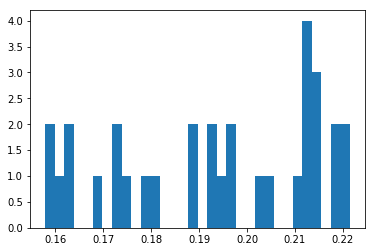

In [105]:
print(acc)
plt.hist(acc, bins = 32)